In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns


In [2]:
df=pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# we can drop the null values as its not as much (just market catogory has 3742 we can also replace it by mode but here we drop it) 

In [5]:
df.shape

(11914, 16)

In [6]:
df['Market Category'].values

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', ..., 'Crossover,Hatchback,Luxury',
       'Crossover,Hatchback,Luxury', 'Luxury'], dtype=object)

In [7]:
df[df.isnull()==1].sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
7119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)


In [9]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# checking and droping the duplicates

In [10]:
df.duplicated().sum()

349

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(7735, 16)

In [14]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# handling the outliers of each integer or float columns

<Axes: >

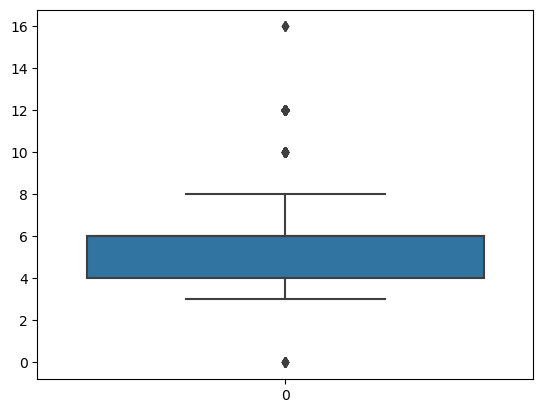

In [15]:
sns.boxplot(df['Engine Cylinders'])

(array([  13.,   26., 2887., 2982.,    0., 1532.,   65.,  227.,    0.,
           3.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

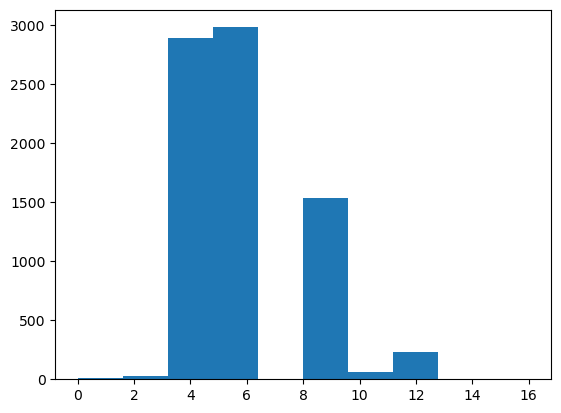

In [16]:
plt.hist(df['Engine Cylinders'])

In [17]:
df._get_numeric_data().columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [18]:
df['Engine HP'].unique()

array([ 335.,  300.,  230.,  320.,  172.,  160.,  130.,  158.,  240.,
        248.,  162.,  217.,  184.,  295.,  140.,  155.,  114.,  100.,
        241.,  180.,  177.,  228.,  121.,  148.,  194.,  218.,  161.,
        292.,  250.,  255.,  222.,   82.,  134.,  306.,  400.,  425.,
        350.,  332.,  268.,  282.,  275.,  201.,  442.,  562.,  597.,
        237.,  445.,  443.,  302.,  322.,  315.,  101.,  135.,  485.,
        238.,  515.,  543.,  631.,  604.,  620.,  611.,  661.,  402.,
        389.,  532.,  641.,  535.,  153.,  144.,  188.,  372.,  108.,
        168.,  190.,  205.,  200.,  227.,  165.,  173.,  220.,  210.,
        280.,  207.,  265.,  260.,  290.,  285.,  390.,  225.,  170.,
        185.,  150.,  430.,  520.,  560.,  475.,  500.,  540.,  370.,
        580.,  420.,  345.,  208.,  181.,  236.,  186.,  252.,  310.,
        333.,  340.,  450.,  281.,  288.,  138.,  137.,  271.,  195.,
        196.,  212.,  278.,  480.,  600.,  375.,  198.,  270.,  503.,
        456.,  317.,

In [19]:
df['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

In [20]:
df['Number of Doors'].unique()

array([2., 4., 3.])

In [21]:
df['Popularity'].unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
        416,   67, 1715, 2031,  376,  549, 1439, 2202, 1624,  520, 5657,
         26, 1385, 1851, 1158,   61,  210,  640,  873,    2, 1720,  204,
        535,   86,  238,  454,  259,  258,  613,  155,  190,  105,   21,
        481,  130,  820], dtype=int64)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7735 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7735 non-null   object 
 1   Model              7735 non-null   object 
 2   Year               7735 non-null   int64  
 3   Engine Fuel Type   7735 non-null   object 
 4   Engine HP          7735 non-null   float64
 5   Engine Cylinders   7735 non-null   float64
 6   Transmission Type  7735 non-null   object 
 7   Driven_Wheels      7735 non-null   object 
 8   Number of Doors    7735 non-null   float64
 9   Market Category    7735 non-null   object 
 10  Vehicle Size       7735 non-null   object 
 11  Vehicle Style      7735 non-null   object 
 12  highway MPG        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  Popularity         7735 non-null   int64  
 15  MSRP               7735 non-null   int64  
dtypes: float64(3), int64(5), obj

<Axes: >

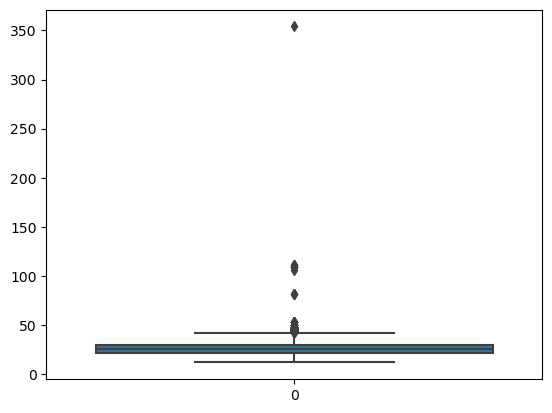

In [23]:
sns.boxplot(df['highway MPG'])

<Axes: >

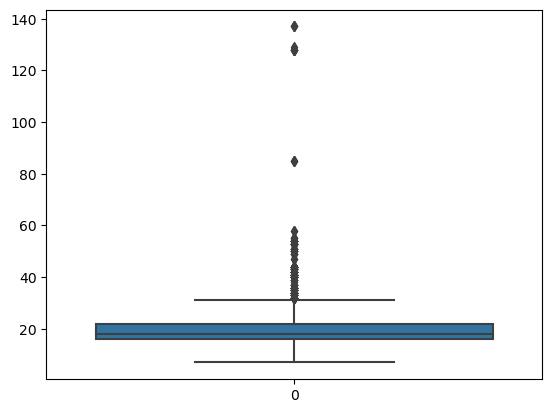

In [24]:
sns.boxplot(df['city mpg'])

<Axes: >

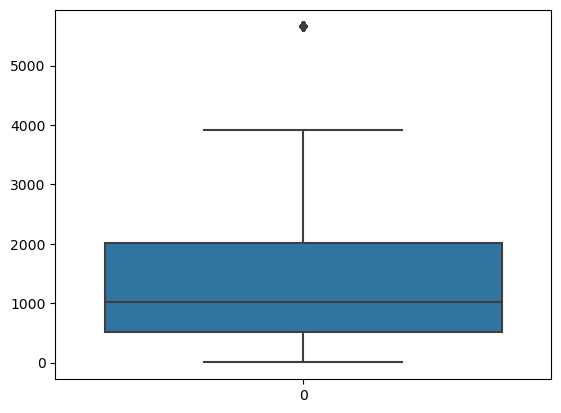

In [25]:
sns.boxplot(df['Popularity'])

<Axes: >

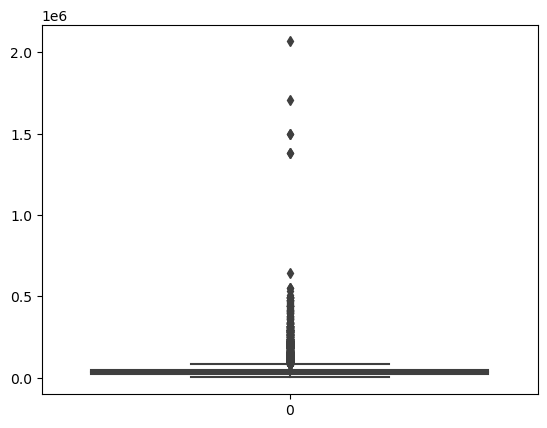

In [26]:
sns.boxplot(df['MSRP'])

In [27]:
df['MSRP'].values

array([46135, 40650, 36350, ..., 50620, 50920, 28995], dtype=int64)

In [28]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


In [29]:
#the highway mpg(miles per gallon) mean is 26 but max is 354 so it means its the outlier
#we check the city mpg and so on

In [30]:
Q1 = df['Engine Cylinders'].quantile(0.25)
Q3 = df['Engine Cylinders'].quantile(0.75)
IQR = Q3 - Q1

df['Engine Cylinders'] = df['Engine Cylinders'][~((df['Engine Cylinders'] < (Q1 - 1.5 * IQR)) |(df['Engine Cylinders'] > (Q3 + 1.5 * IQR)))]

In [31]:
df.shape

(7735, 16)

In [32]:
Q1 = df['highway MPG'].quantile(0.25)
Q3 = df['highway MPG'].quantile(0.75)
IQR = Q3 - Q1

df['highway MPG'] = df['highway MPG'][~((df['Engine Cylinders'] < (Q1 - 1.5 * IQR)) |(df['highway MPG'] > (Q3 + 1.5 * IQR)))]

In [33]:
df.shape

(7735, 16)

<Axes: >

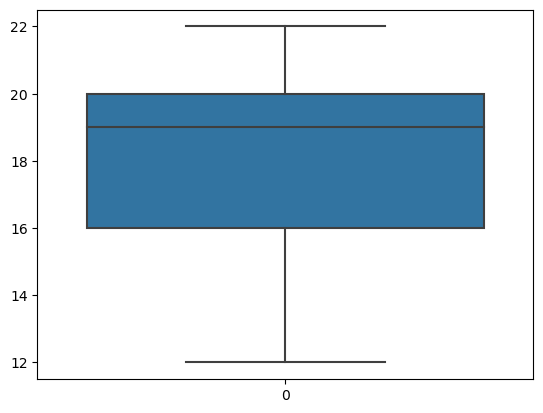

In [34]:
sns.boxplot(df['highway MPG'])

In [35]:
Q1 = df['city mpg'].quantile(0.25)
Q3 = df['city mpg'].quantile(0.75)
IQR = Q3 - Q1

df['city mpg'] = df['city mpg'][~((df['city mpg'] < (Q1 - 1.5 * IQR)) |(df['city mpg'] > (Q3 + 1.5 * IQR)))]

<Axes: >

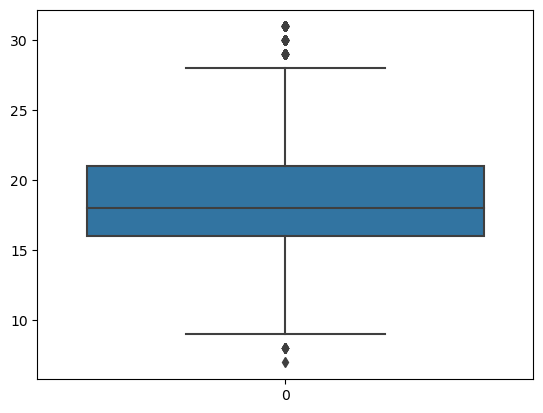

In [36]:
sns.boxplot(df['city mpg'])

In [37]:
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1

df['Popularity'] = df['Popularity'][~((df['Popularity'] < (Q1 - 1.5 * IQR)) |(df['Popularity'] > (Q3 + 1.5 * IQR)))]

<Axes: >

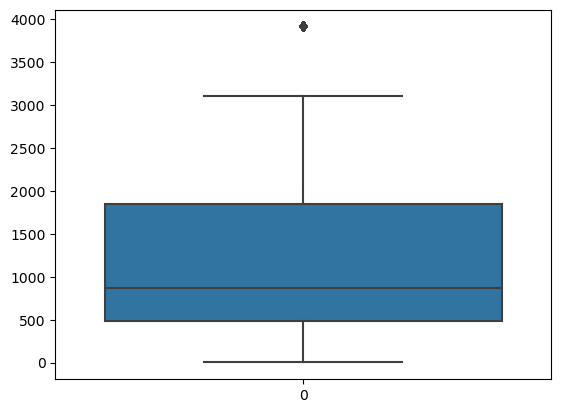

In [38]:
sns.boxplot(df['Popularity'])

In [39]:
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)
IQR = Q3 - Q1

df['MSRP'] = df['MSRP'][~((df['MSRP'] < (Q1 - 1.5 * IQR)) |(df['MSRP'] > (Q3 + 1.5 * IQR)))]

<Axes: >

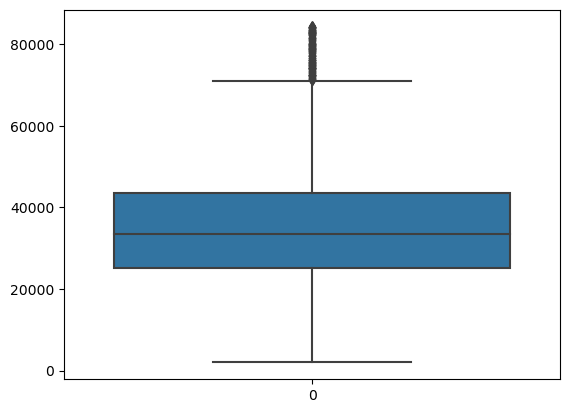

In [40]:
sns.boxplot(df['MSRP'])

In [41]:
df.shape

(7735, 16)

# now thw dataframe is clear from any type of outliers

In [42]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# from now we can do the exploratory data analysis or feature engineering and visualizations

In [43]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,7735.00000,7735.000000,7427.000000,7735.000000,295.000000,7494.000000,7250.000000,6936.000000
mean,2012.14958,277.632062,5.606301,3.421332,18.203390,18.642247,1235.886069,34695.966984
std,6.23167,115.529955,1.508340,0.895054,2.371742,4.429435,976.477873,16705.415779
min,1990.00000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000,2000.000000
25%,2010.00000,194.000000,4.000000,2.000000,16.000000,16.000000,481.000000,25195.000000
50%,2015.00000,270.000000,6.000000,4.000000,19.000000,18.000000,873.000000,33570.000000
75%,2016.00000,325.000000,6.000000,4.000000,20.000000,21.000000,1851.000000,43550.000000
max,2017.00000,1001.000000,8.000000,4.000000,22.000000,31.000000,3916.000000,84325.000000


In [45]:
df.to_csv('cleaned_car_dataset.csv')